In [120]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_path(pose_matrices):
    fig = plt.figure()
    ax = plt.axes()
    plt.scatter(pose_matrices[:,2,3], pose_matrices[:,0,3])
    ax.axis('equal')
    return fig, ax

def analyze_file(file_path):
    with open(file_path) as f:
        d = json.load(f)
        resolutions = d['cloudAnchorResolutions'] if 'cloudAnchorResolutions' in d else [] 
        cloud_landmarks = d['cloudAnchorLandmarks'] if 'cloudAnchorLandmarks' in d else []
        poses = d['poses']
        print(d.keys())
        resolved_anchor_set = set(map(lambda x: x['cloudID'], resolutions))
        unresolved_anchors = set(cloud_landmarks) - resolved_anchor_set
        pose_matrices = np.asarray(poses).reshape(-1, 4, 4).swapaxes(1,2)
        fig, ax = plot_path(pose_matrices)
        plt.show(fig)
        
        for cloudID in resolved_anchor_set:
            fig = plot_path(pose_matrices)
            anchor_resolutions = list(filter(lambda x: x['cloudID'] == cloudID, resolutions))
            anchor_poses = np.asarray(list(map(lambda x: x['pose'], anchor_resolutions))).reshape(-1, 4, 4).swapaxes(1, 2)
            map_poses = np.asarray(list(map(lambda x: x['mapPose'], anchor_resolutions))).reshape(-1, 4, 4).swapaxes(1, 2)
            print(anchor_poses.shape)
            plt.scatter(anchor_poses[:,2,3], anchor_poses[:,0,3], color='k')
            plt.quiver(anchor_poses[:,2,3], anchor_poses[:,0,3], anchor_poses[:,0,0], anchor_poses[:,2,0], color='r')
            plt.quiver(anchor_poses[:,2,3], anchor_poses[:,0,3], anchor_poses[:,0,2], anchor_poses[:,2,2], color='y')
            plt.legend(['path', 'cloud anchor positions', 'cloud anchor x-axis', 'cloud anchor z-axis'])
            plt.show()
        return (file_path, resolved_anchor_set, unresolved_anchors)

all_logs = sorted(glob.glob('logs/*.log'), key=os.path.getmtime, reverse=True)

1 1


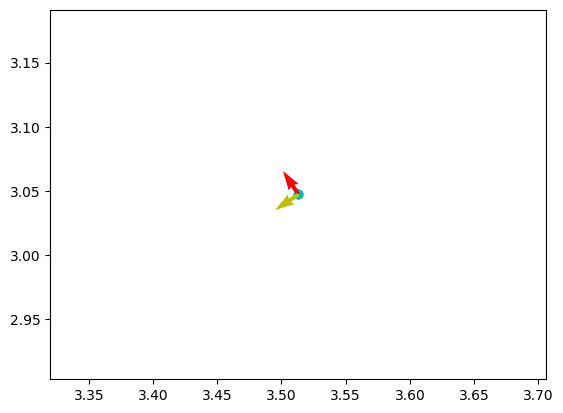

2 2


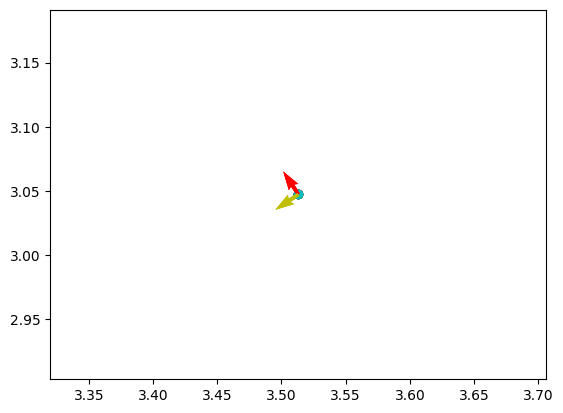

2 2


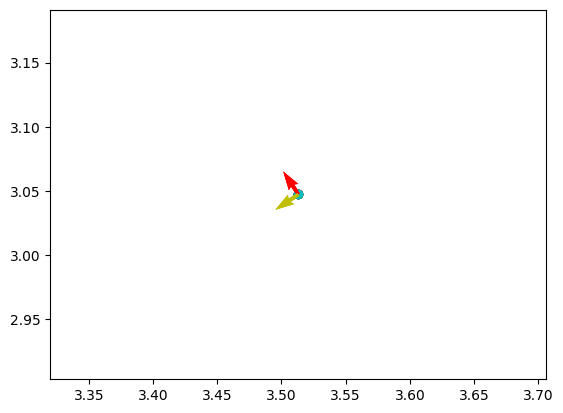

2 3


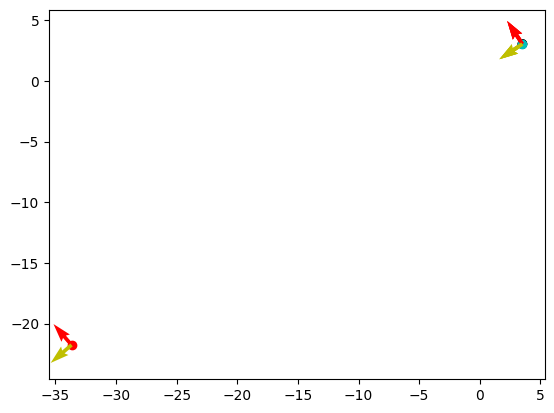

2 3


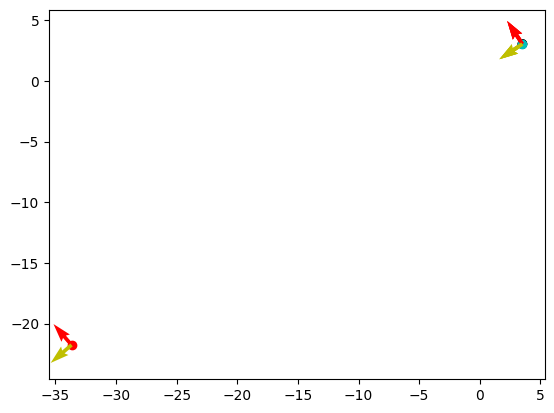

2 3


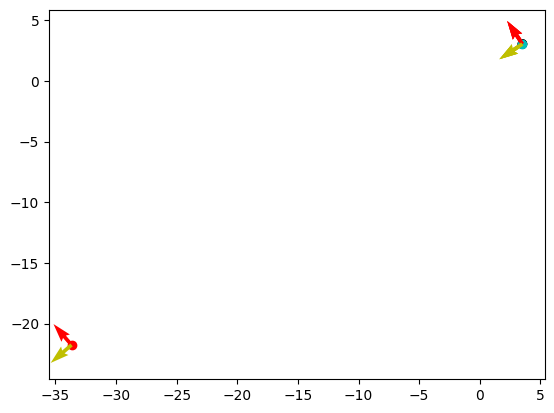

2 3


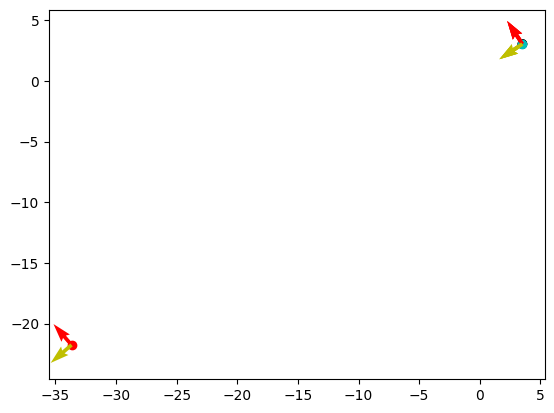

2 3


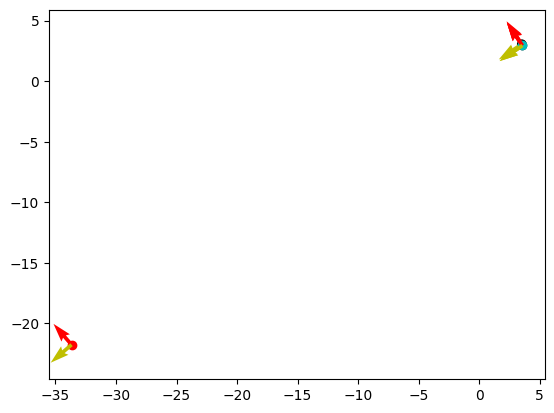

2 3


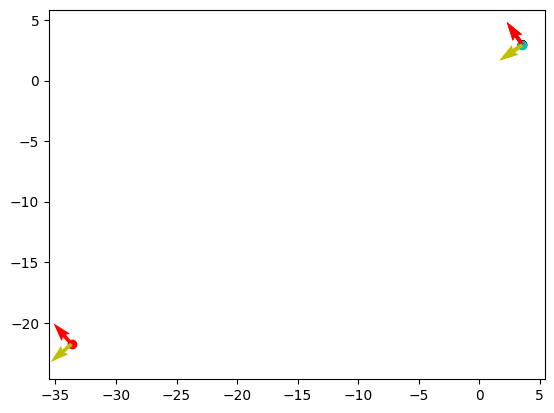

2 3


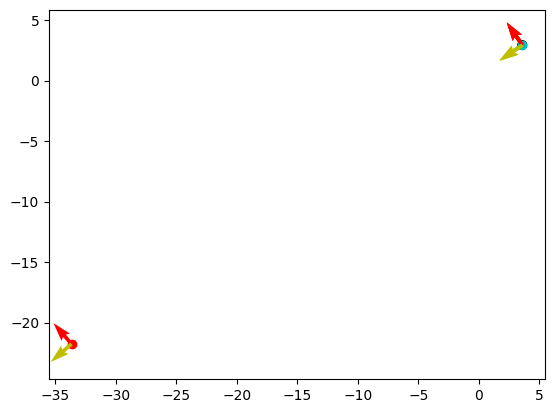

2 3


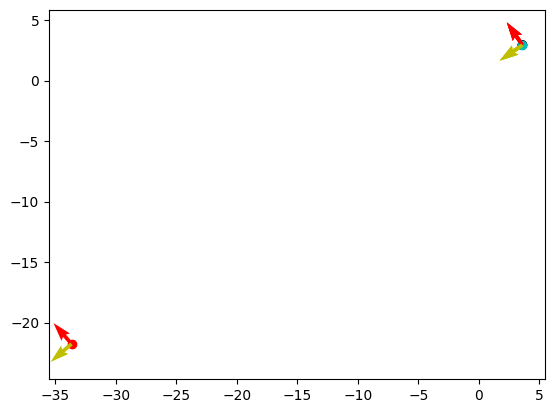

2 3


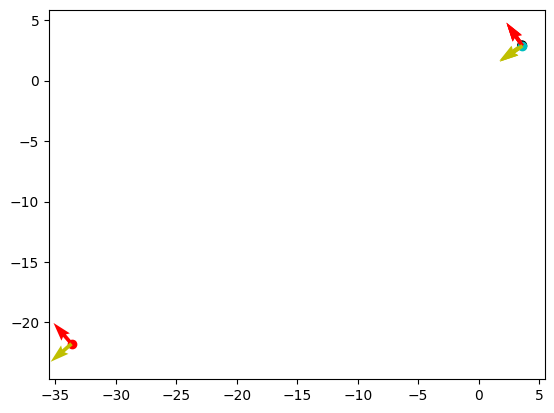

2 3


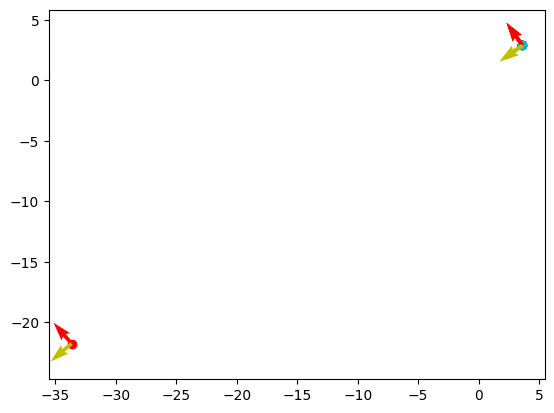

2 3


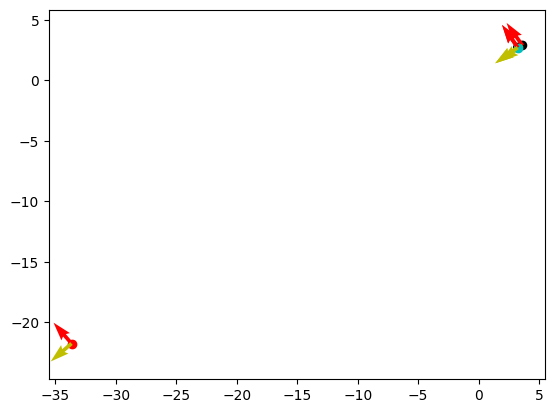

2 3


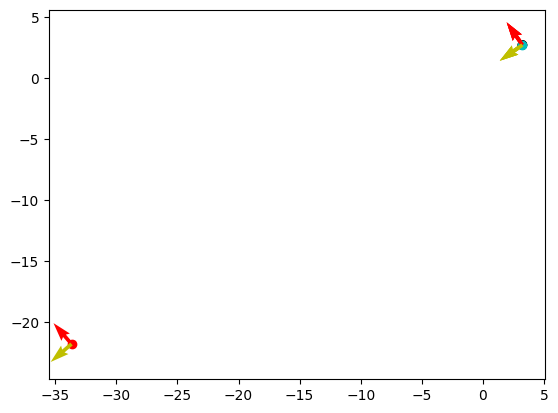

2 3


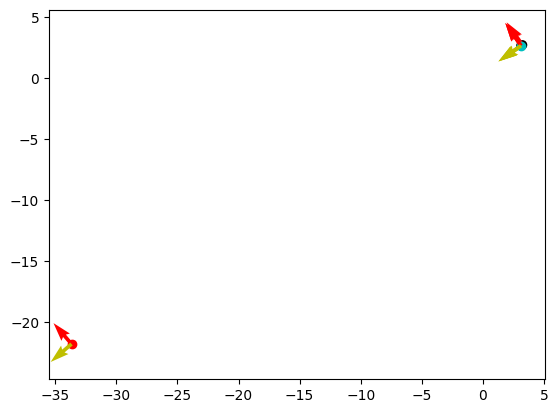

2 3


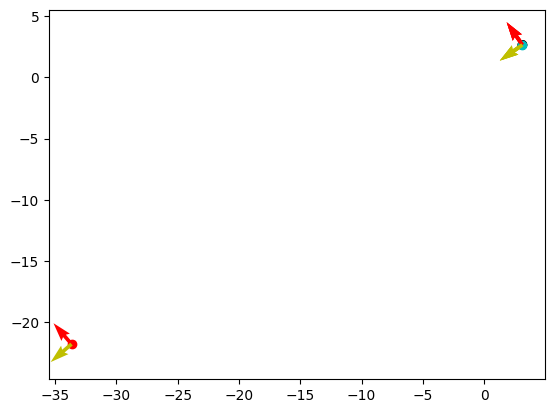

2 3


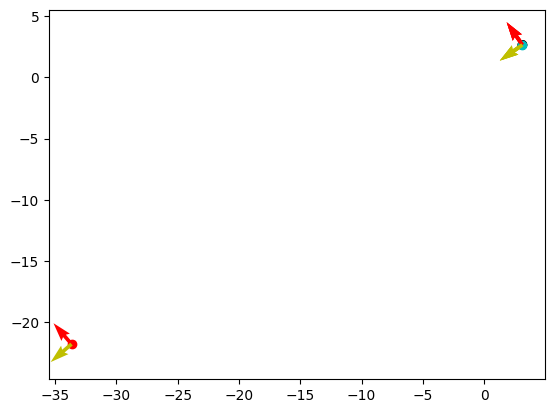

2 3


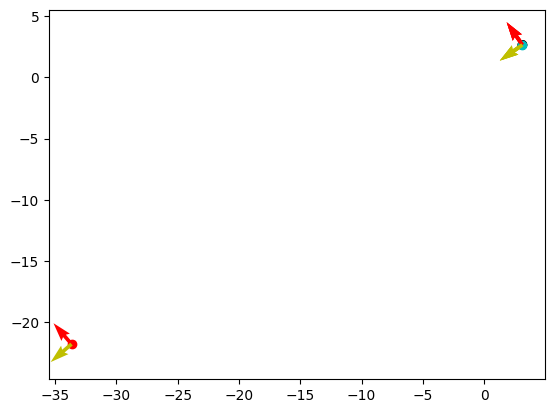

2 3


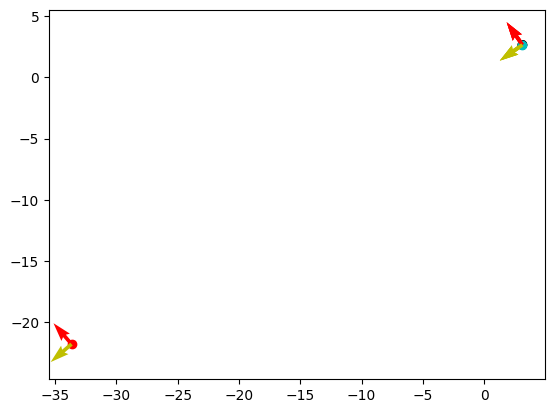

2 3


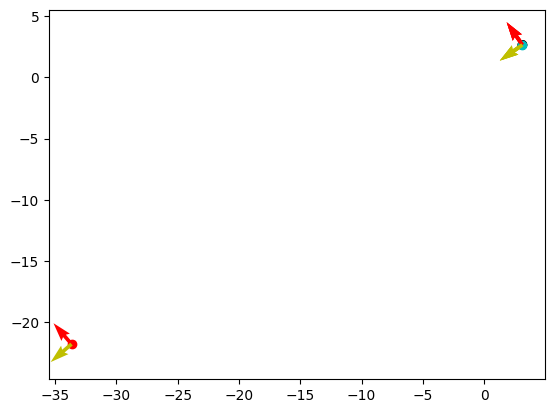

2 3


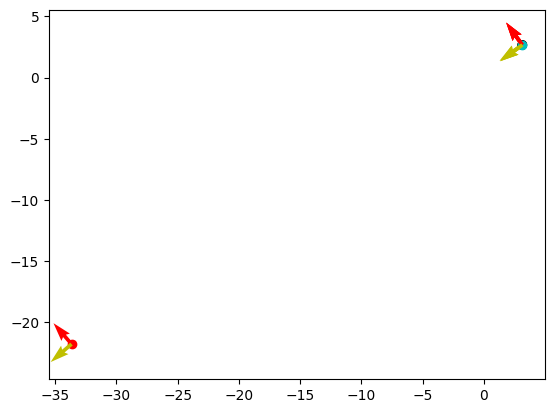

2 3


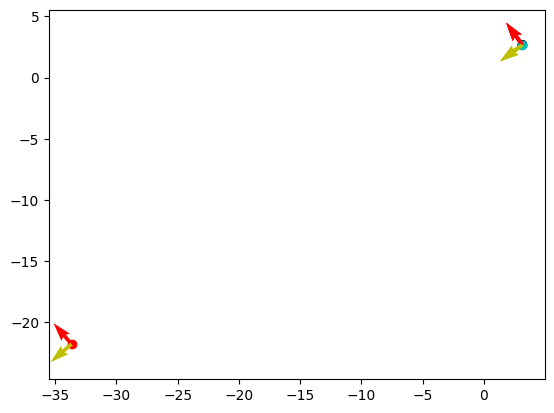

2 3


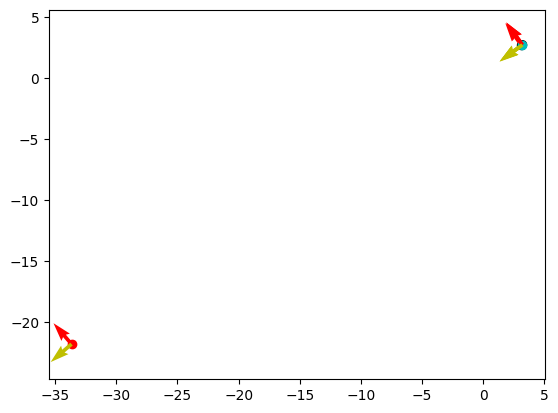

2 3


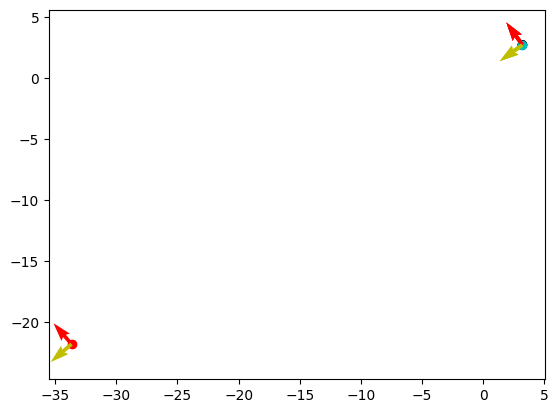

2 3


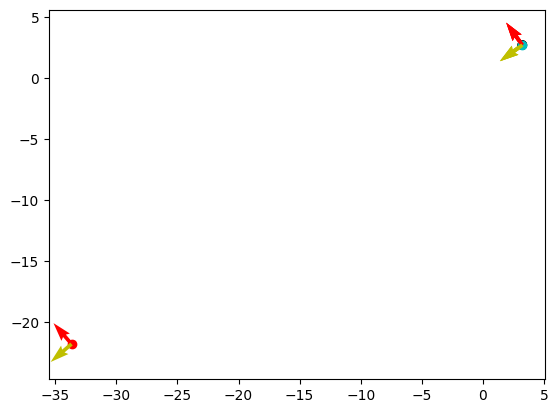

2 3


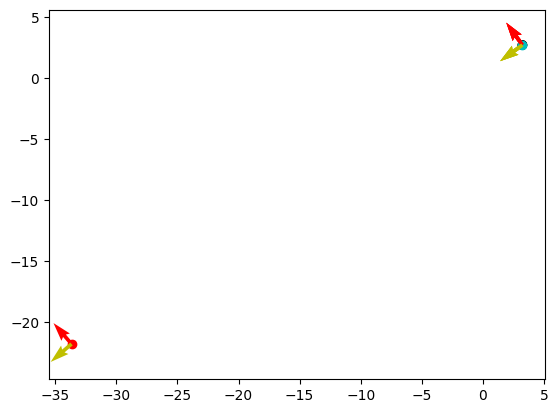

3 4


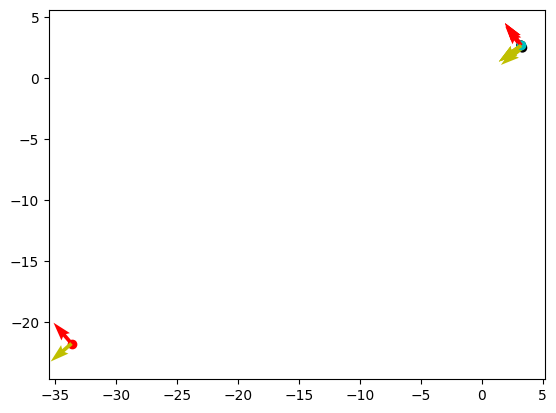

3 4


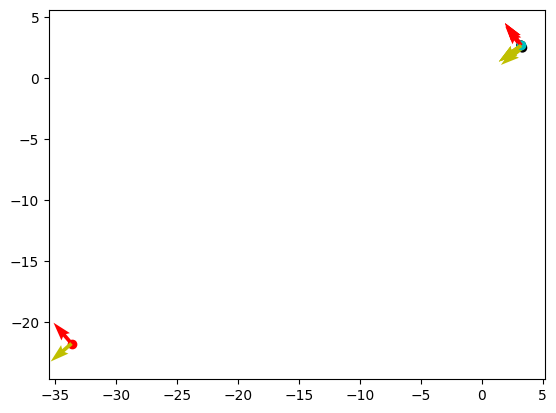

3 4


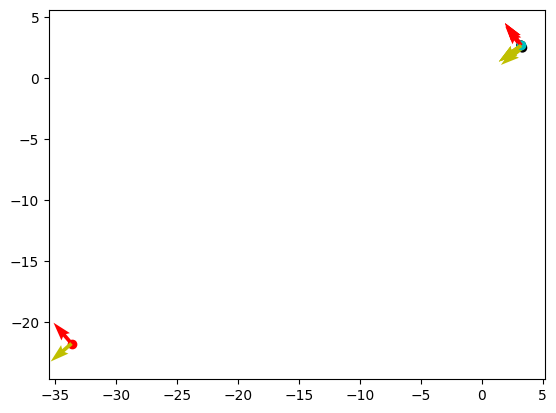

3 4


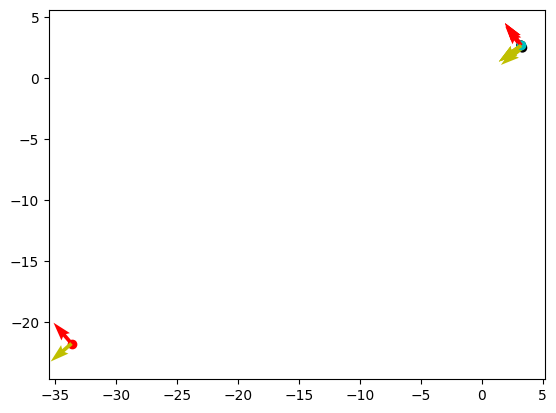

4 5


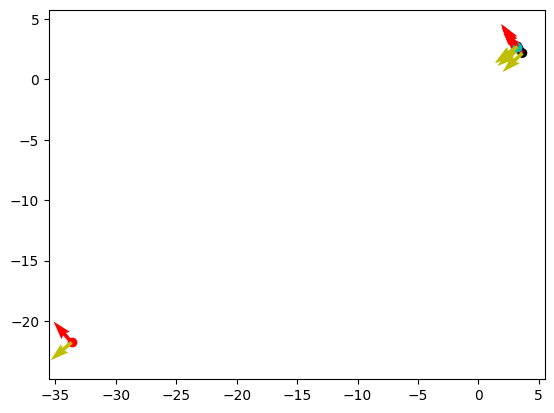

4 5


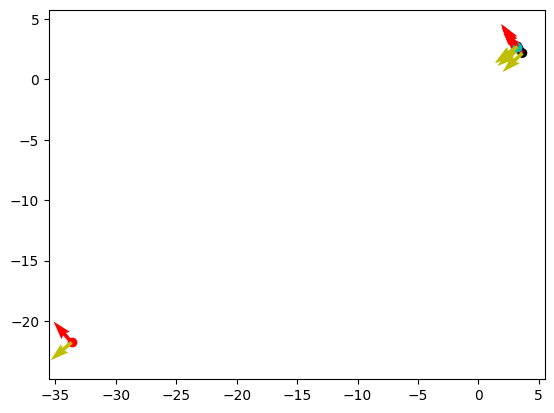

4 5


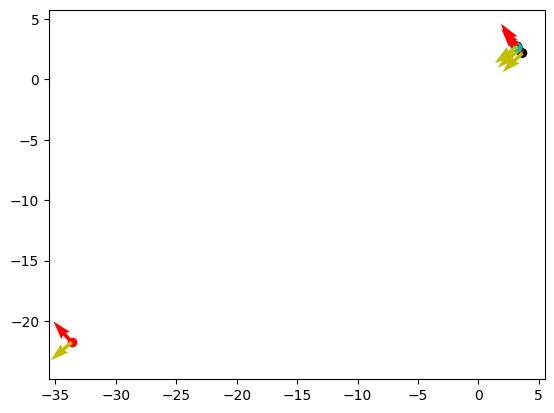

4 5


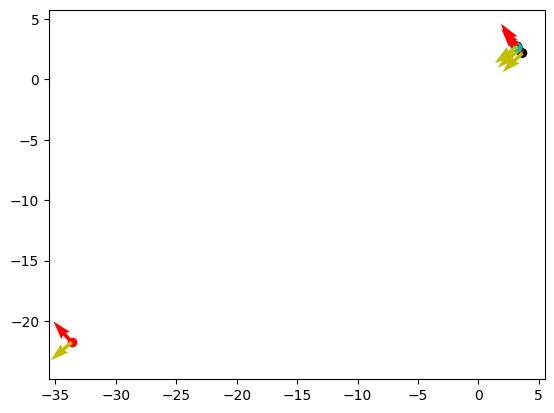

4 5


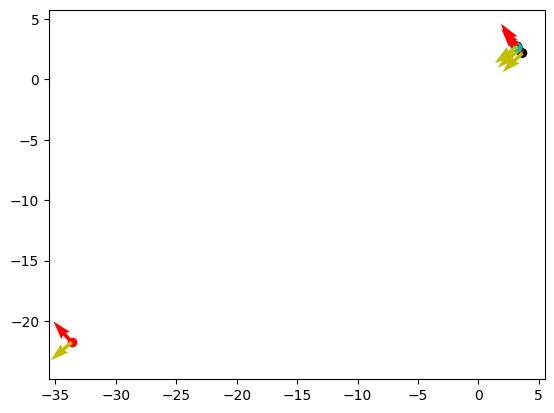

4 5


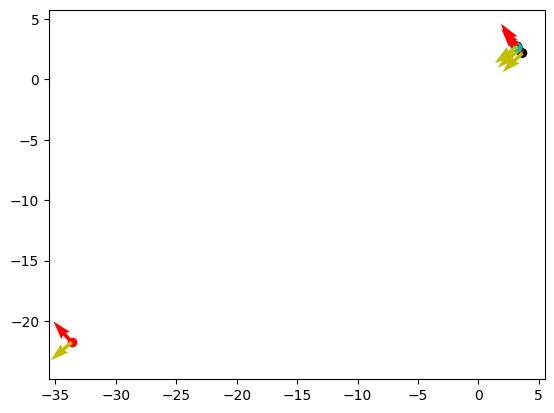

4 5


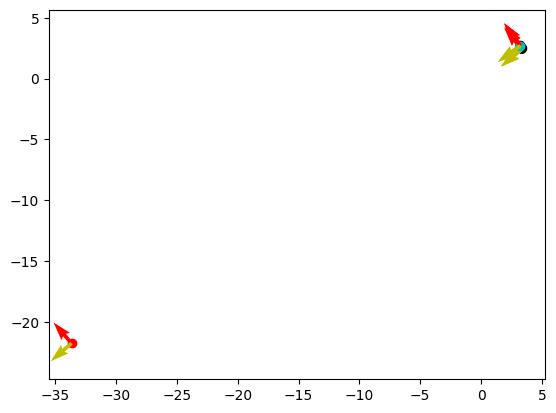

4 5


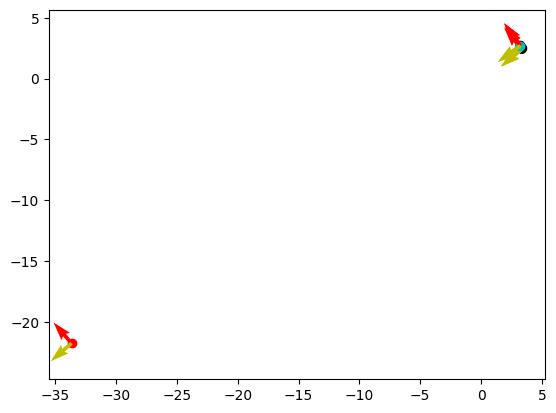

5 6


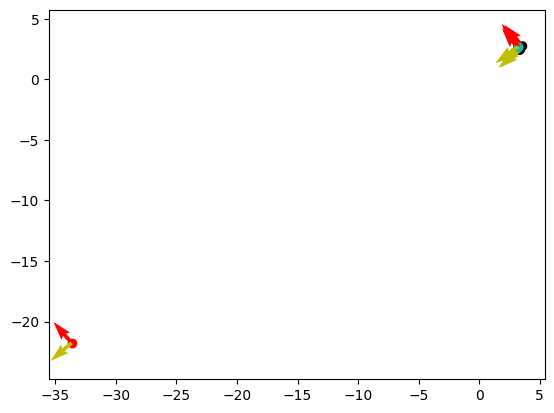

5 6


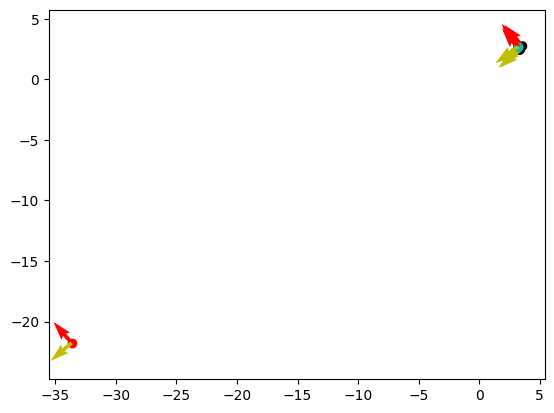

5 6


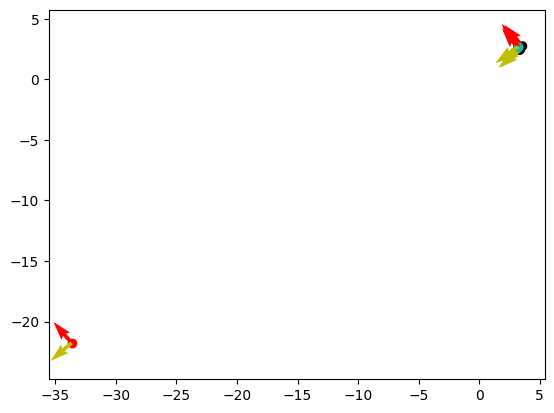

5 6


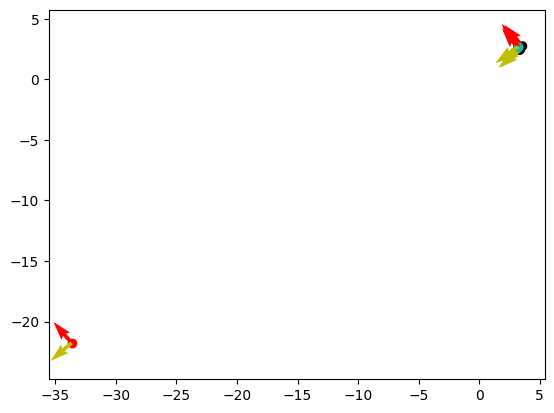

5 6


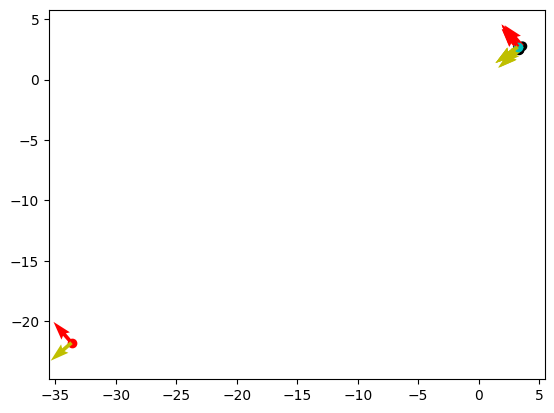

5 6


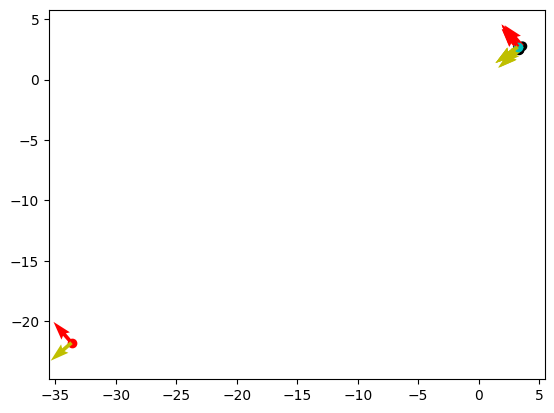

5 6


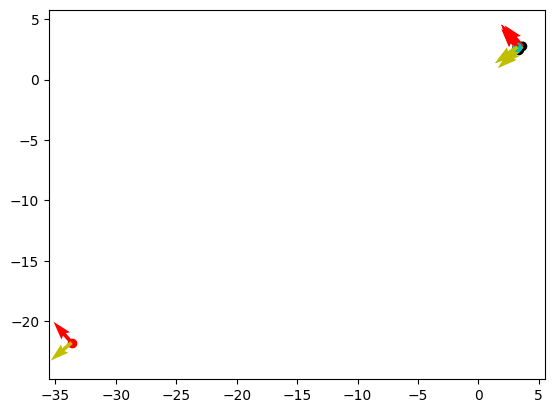

5 6


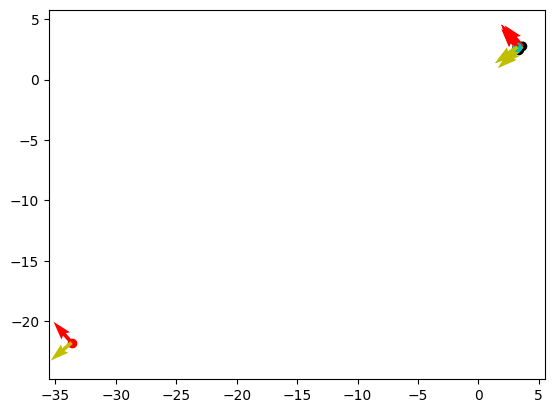

6 7


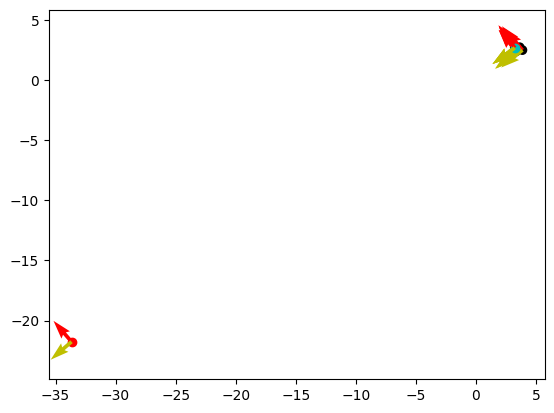

6 7


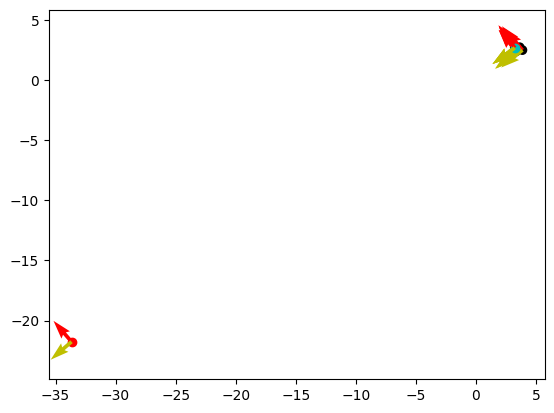

6 7


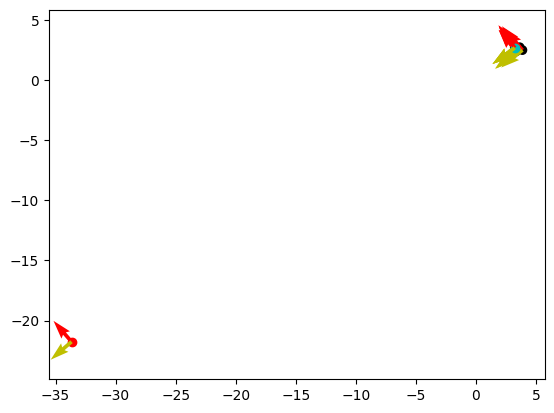

6 7


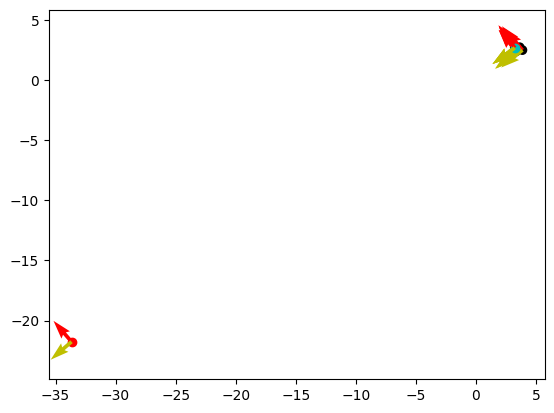

7 8


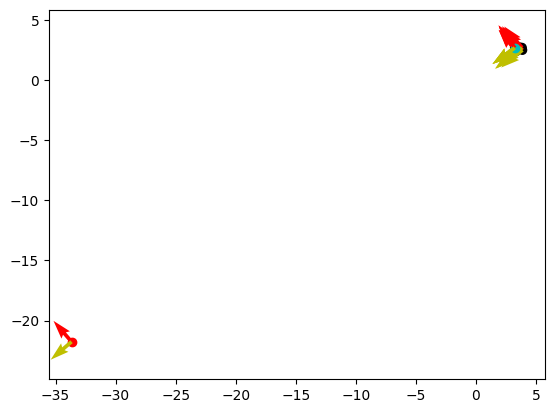

7 8


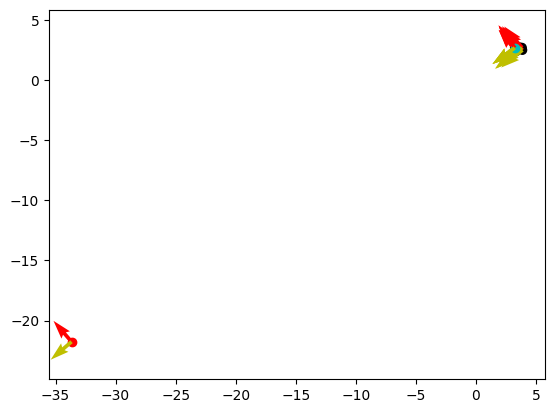

7 8


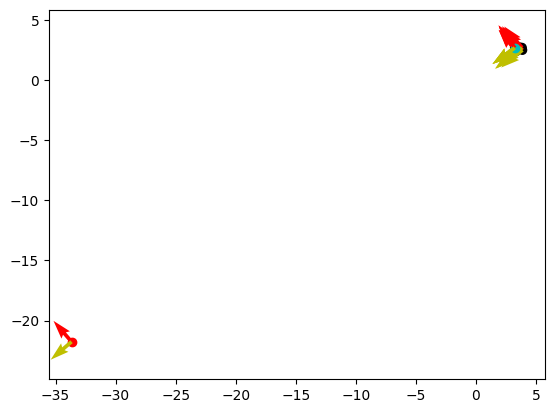

7 8


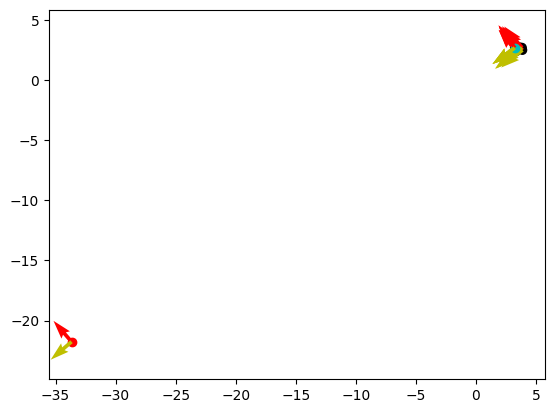

7 8


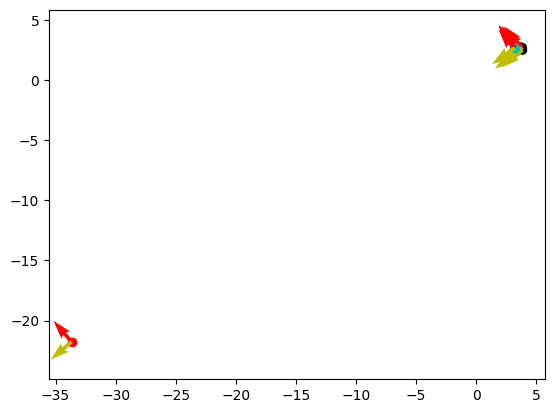

7 8


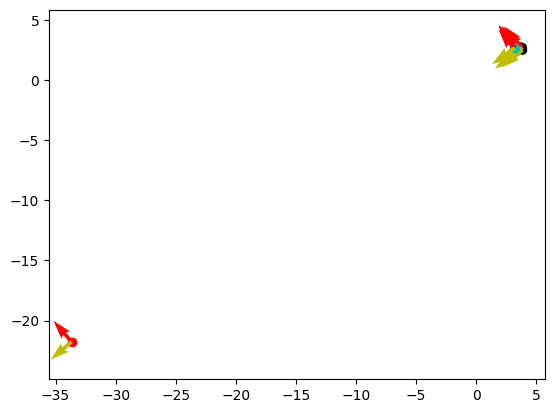

7 8


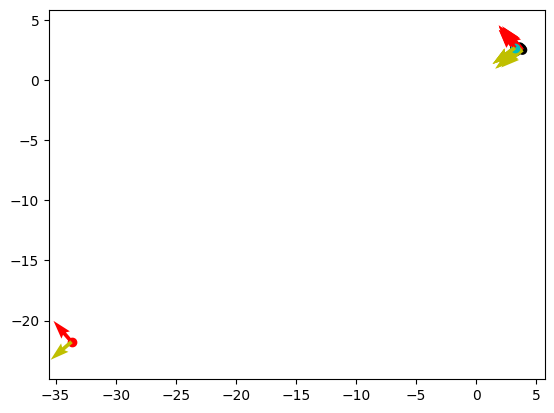

7 8


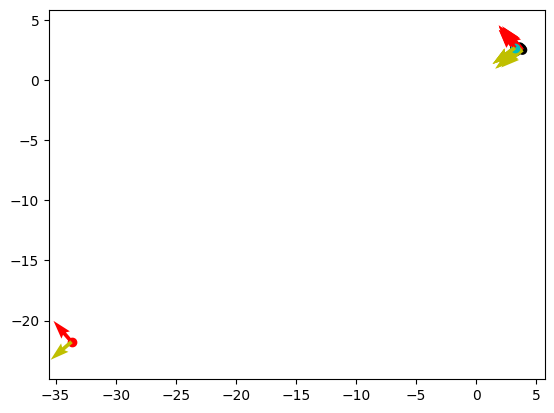

7 8


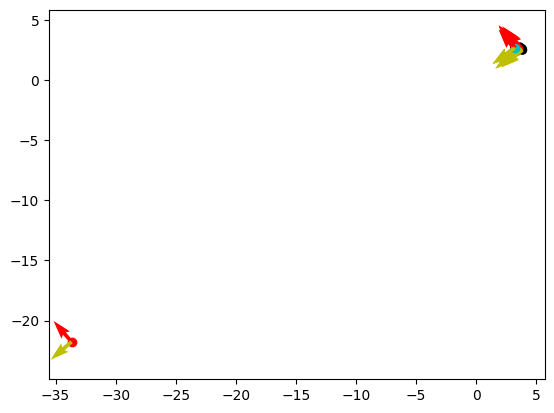

7 8


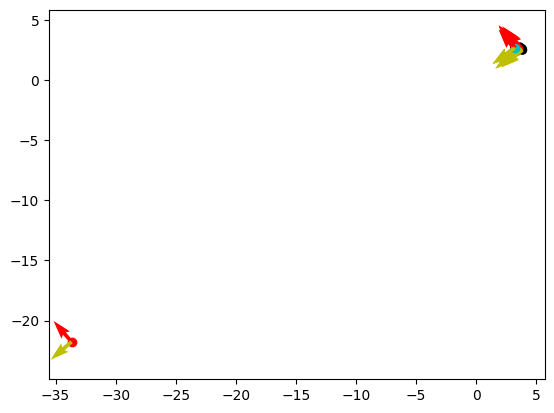

7 8


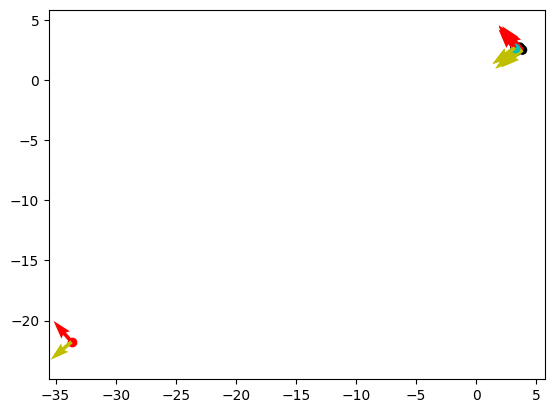

7 8


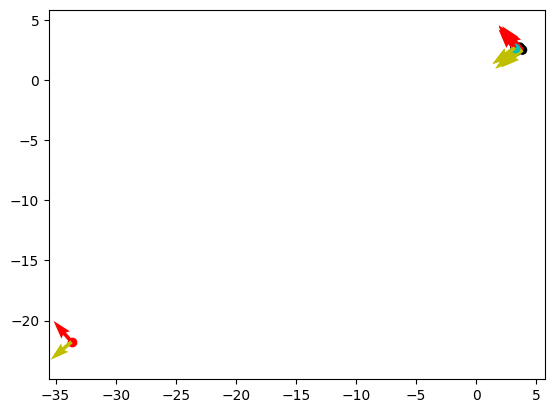

8 9


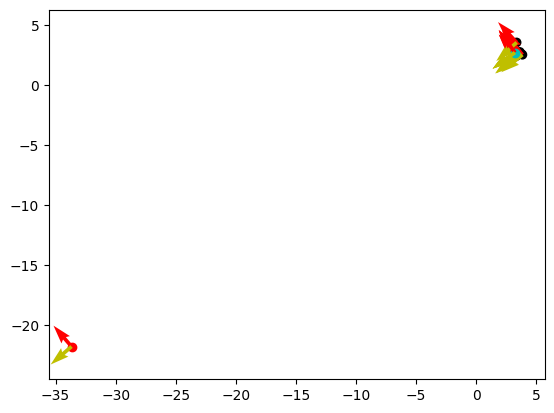

8 9


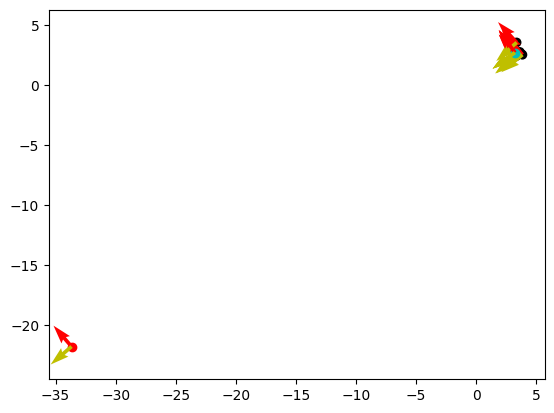

8 9


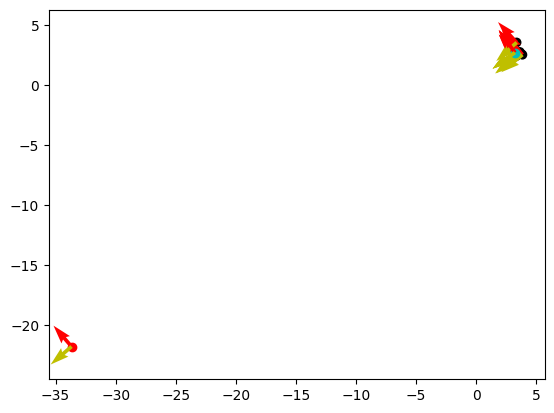

8 9


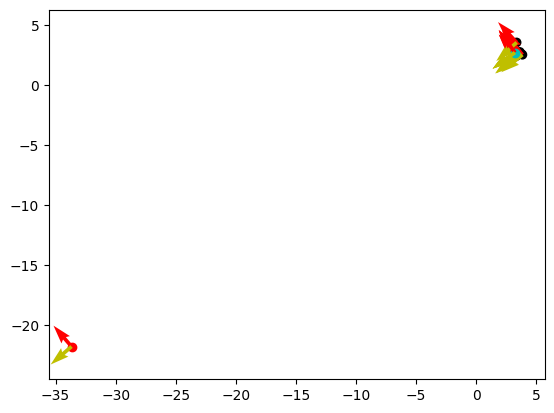

9 10


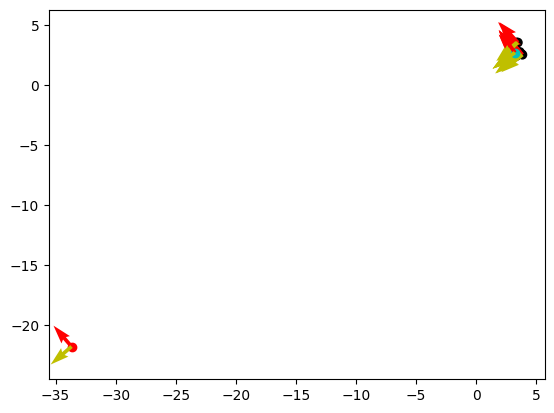

9 10


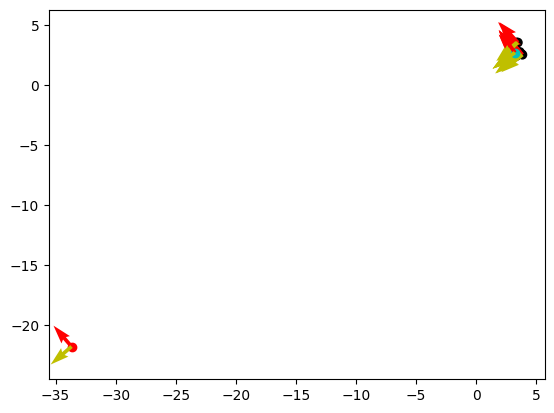

9 10


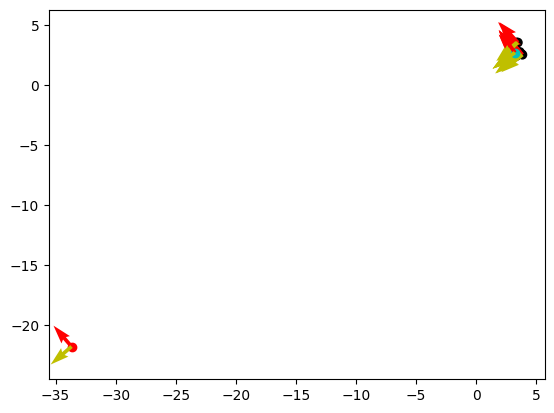

9 10


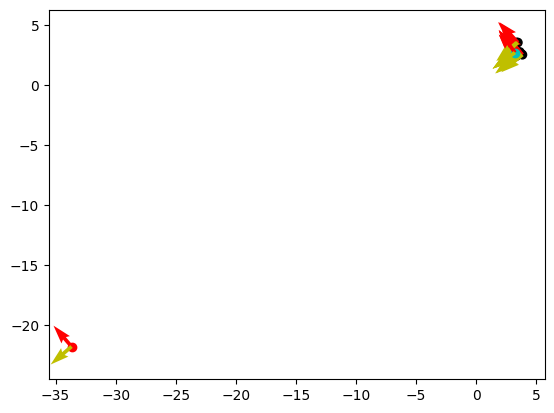

9 10


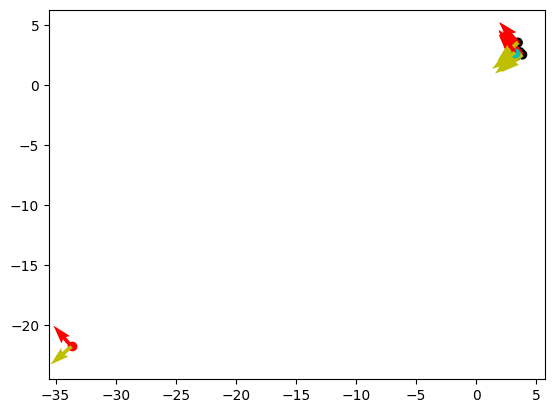

9 10


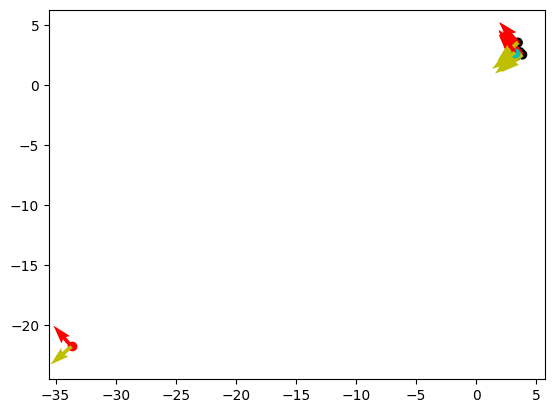

9 10


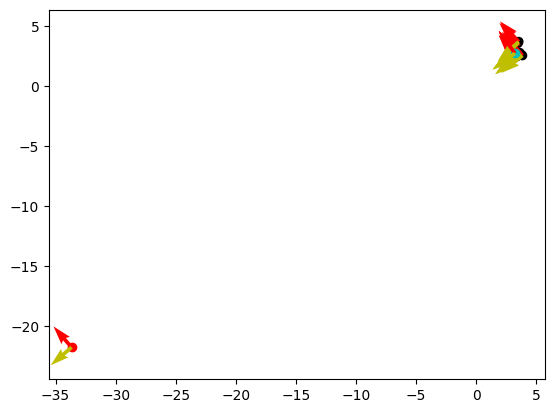

9 10


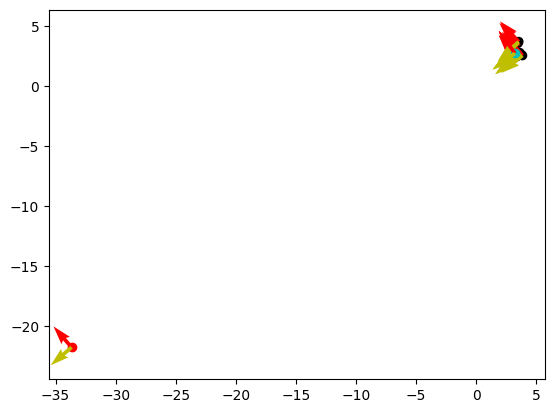

9 10


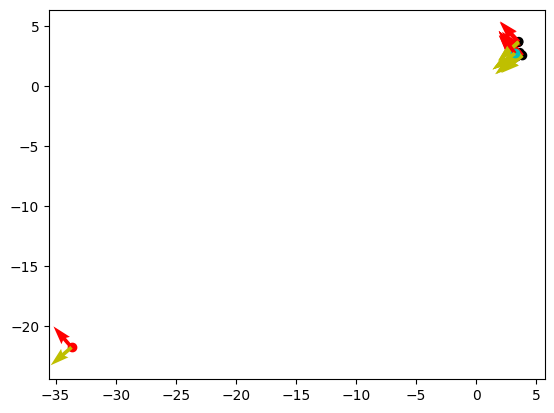

9 10


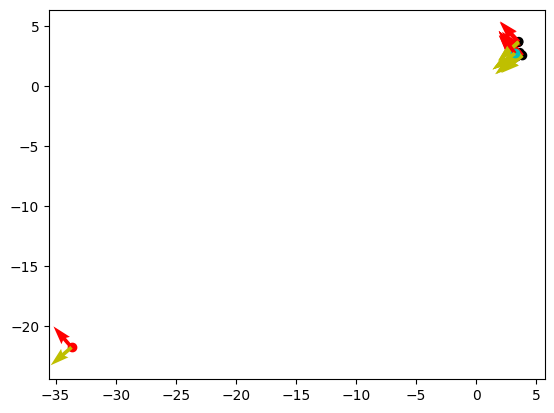

9 10


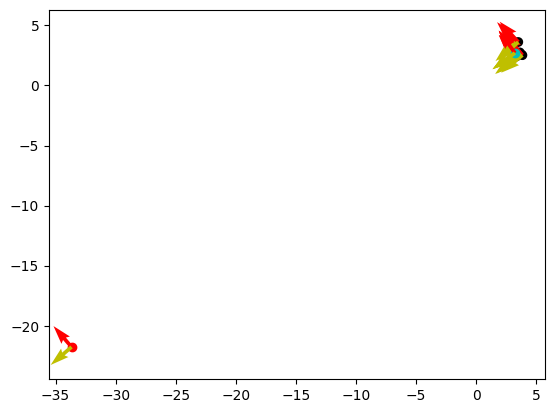

9 10


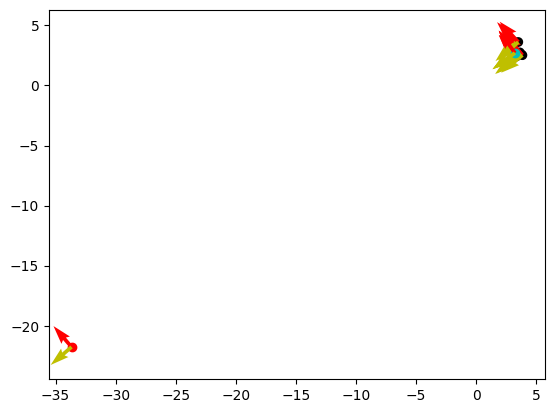

9 10


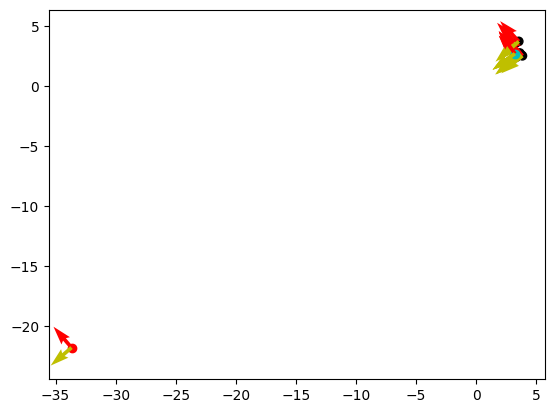

9 10


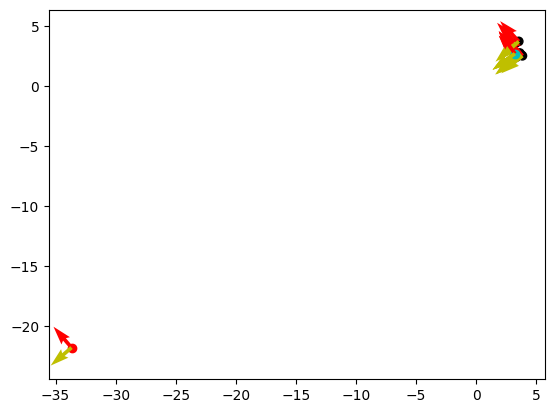

10 10


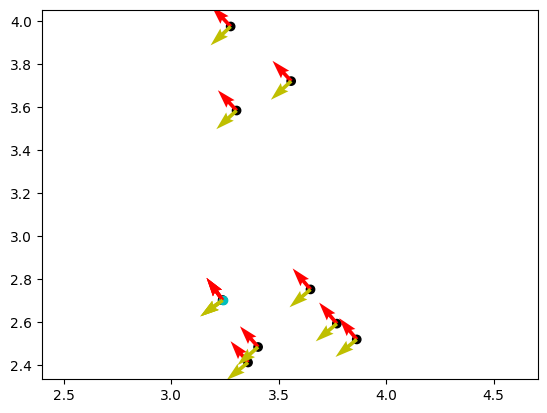

10 10


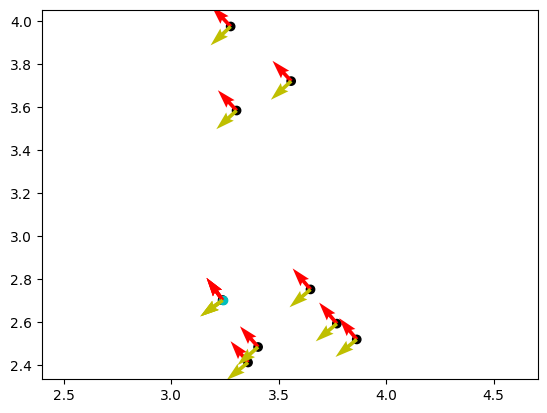

10 10


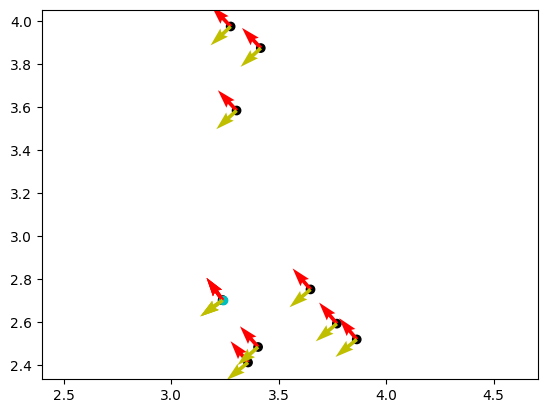

10 10


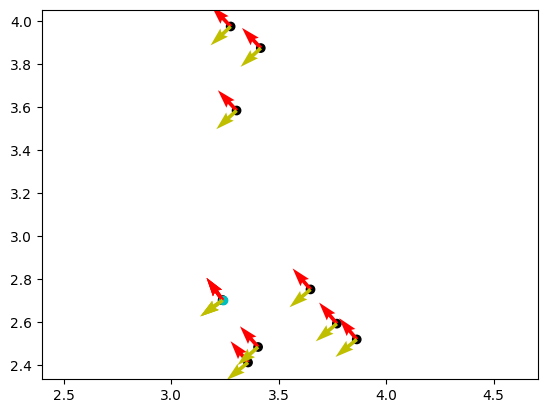

10 10


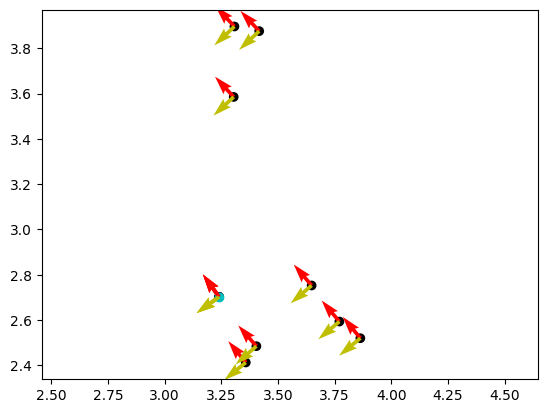

10 10


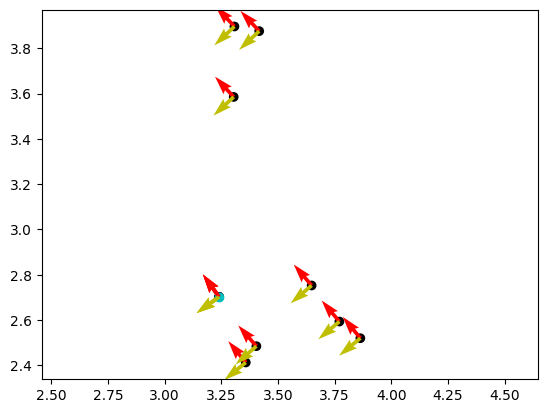

11 11


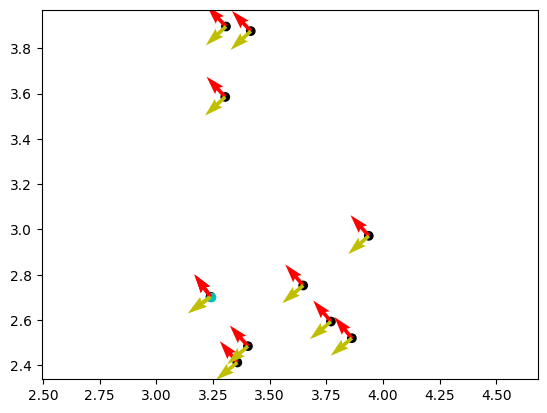

11 11


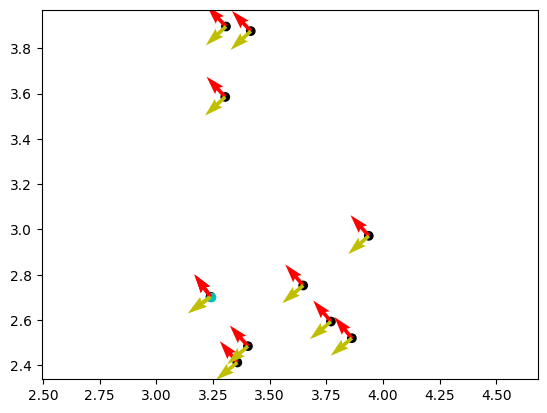

11 11


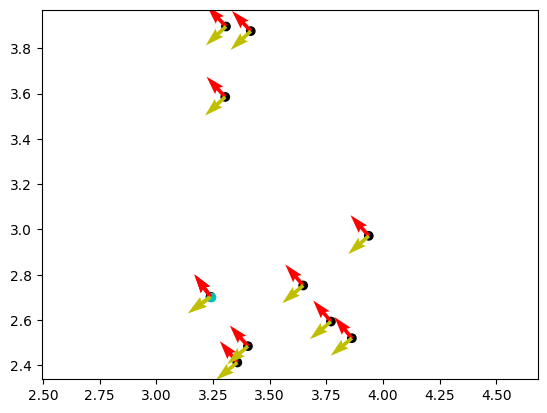

11 11


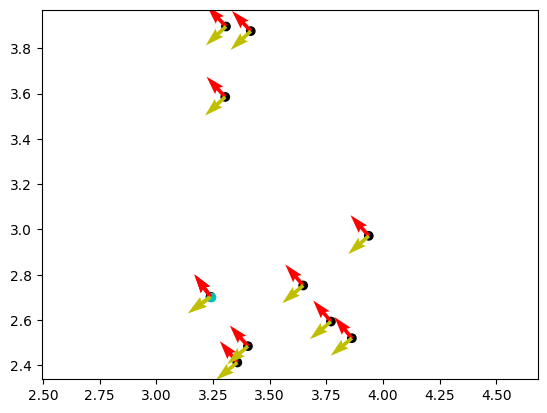

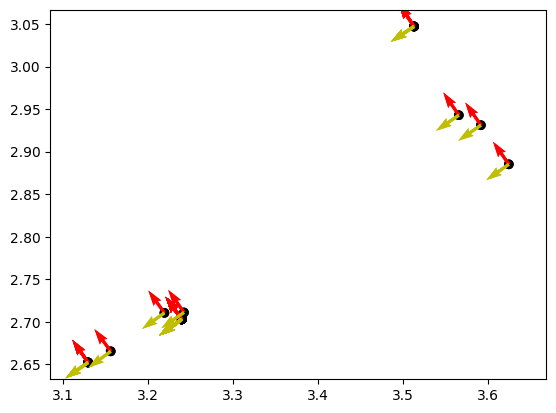

In [126]:
def plot_poses_in_ground_plane(poses, colors=None):
    if colors is None:
        colors = ['k']*poses.shape[0]
    plt.scatter(poses[:,2,3], poses[:,0,3], color=colors)
    ax.axis('equal')
    plt.quiver(poses[:,2,3], poses[:,0,3], poses[:,0,0], poses[:,2,0], color='r')
    plt.quiver(poses[:,2,3], poses[:,0,3], poses[:,0,2], poses[:,2,2], color='y')

def do_filtering(current_alignment, proposed_alignments):
    votes = []
    for (cloudID, proposed_alignment) in proposed_alignments.items():
        other_alignments = [current_alignment] if current_alignment is not None else []
        other_alignments += proposed_alignments.values()
        vote = 0
        inliers = []
        outliers = []
        for other_alignment in other_alignments:
            distance = np.linalg.norm(other_alignment[:,-1] - proposed_alignment[:,-1])
            if distance < 2.0:
                vote += 1
                inliers.append(other_alignment)
            else:
                outliers.append(other_alignment)
        votes.append((vote, proposed_alignment, inliers, outliers))
    
    best = max(votes, key=lambda x: x[0])
    max_votes = len(proposed_alignments) + (1 if current_alignment is not None else 0)
    print(best[0], max_votes)
    fig = plt.figure()
    ax = plt.axes()
    plot_poses_in_ground_plane(np.array(best[2]), ['k']*len(best[2]))
    if len(best[3]) > 0:
        plot_poses_in_ground_plane(np.array(best[3]), ['r']*len(best[3]))
    plot_poses_in_ground_plane(np.expand_dims(np.array(best[1]), axis=0), 'c')
    ax.axis('equal')
    plt.show()
    return best[1]

def do_sequential_processing(file_name):
    with open(file_name) as f:
         d = json.load(f)
    timestamps = np.array(list(map(lambda x: x['timestamp'], d['cloudAnchorResolutions'])))
    proposed_alignments = {}
    consensus_alignments = []
    consensus_alignment = None
    for resolution in d['cloudAnchorResolutions']:
        map_pose = np.array(resolution['mapPose']).reshape((4,4)).swapaxes(0, 1)
        pose = np.array(resolution['pose']).reshape((4,4)).swapaxes(0, 1)
        proposed_alignment = pose @ np.linalg.inv(map_pose)
        proposed_alignments[resolution['cloudID']] = proposed_alignment
        consensus_alignment = do_filtering(consensus_alignment, proposed_alignments)
        consensus_alignments.append(consensus_alignment)
    return np.array(consensus_alignments)

consensus = do_sequential_processing('logs/419_409_27B4CD3E-EC45-4667-94FB-D37E5EC337E2.log')

fig = plt.figure()
ax = plt.axes()
plot_poses_in_ground_plane(consensus)
ax.axis('equal')
plt.show()

In [179]:
def get_closest_device_pose_to_timestamp(data, cloudAnchor):
    pose_timestamps = np.array(data['poseTimestamp'])
    cloud_anchor_timestamp = cloudAnchor['timestamp']
    print(pose_timestamps)
    print(np.argmin(np.abs(pose_timestamps - cloud_anchor_timestamp)))

def merge_poses_to_cloud_anchor_resolutions(data):
    with open(x) as f:
        for cloudAnchor in data['cloudAnchorResolutions']:
            pose = get_closest_device_pose_to_timestamp(data, cloudAnchor)
            print(cloudAnchor)

x = 'logs/419_409_27B4CD3E-EC45-4667-94FB-D37E5EC337E2.log'
with open(x) as f:
    data = json.load(f)

merge_poses_to_cloud_anchor_resolutions(data)

[37290.90571079 37290.92238012 37290.93905954 ... 37446.86557967
 37446.88225783 37446.89893267]
1020
{'mapPose': [-0.2062138319015503, -1.4668206649304238e-09, -0.9785072207450867, 0, 1.4668206649304238e-09, 1, -1.8081618424758972e-09, 0, 0.9785072207450867, -1.8081618424758972e-09, -0.2062138319015503, 0, -1.5777788162231445, -0.04022343084216118, 4.769830226898193, 1], 'timestamp': 37307.947821541, 'pose': [0.9299694299697876, -0.001220537698827684, 0.3676348328590393, 0, 0.02151268720626831, 0.9984616041183472, -0.05110365152359009, 0, -0.36700689792633057, 0.055433645844459534, 0.9285650253295898, 0, -0.06391545385122299, 0.09803052246570587, -0.4278780221939087, 1], 'cloudID': 'ua-f9903da20f454486c000429d6e0d13d1', 'sessionID': '146B846E-5337-4F0F-9DF7-5B1877516A65'}
[37290.90571079 37290.92238012 37290.93905954 ... 37446.86557967
 37446.88225783 37446.89893267]
1020
{'mapPose': [-0.2062138319015503, -1.4668206649304238e-09, -0.9785072207450867, 0, 1.4668206649304238e-09, 1, -1.8

(9052, 1)


In [176]:
data['cloudAnchorResolutions'][0]

{'mapPose': [-0.2062138319015503,
  -1.4668206649304238e-09,
  -0.9785072207450867,
  0,
  1.4668206649304238e-09,
  1,
  -1.8081618424758972e-09,
  0,
  0.9785072207450867,
  -1.8081618424758972e-09,
  -0.2062138319015503,
  0,
  -1.5777788162231445,
  -0.04022343084216118,
  4.769830226898193,
  1],
 'timestamp': 37307.947821541,
 'pose': [0.9299694299697876,
  -0.001220537698827684,
  0.3676348328590393,
  0,
  0.02151268720626831,
  0.9984616041183472,
  -0.05110365152359009,
  0,
  -0.36700689792633057,
  0.055433645844459534,
  0.9285650253295898,
  0,
  -0.06391545385122299,
  0.09803052246570587,
  -0.4278780221939087,
  1],
 'cloudID': 'ua-f9903da20f454486c000429d6e0d13d1',
 'sessionID': '146B846E-5337-4F0F-9DF7-5B1877516A65'}